In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Combine the datasets to ensure consistent encoding
combined_data = pd.concat([train_data, test_data], sort=False)

# Fill missing values for the combined dataset
combined_data['Age'].fillna(combined_data['Age'].median(), inplace=True)
combined_data['Embarked'].fillna(combined_data['Embarked'].mode()[0], inplace=True)
combined_data['Fare'].fillna(combined_data['Fare'].median(), inplace=True)

# Encode categorical variables using the combined data
label_encoder_sex = LabelEncoder()
combined_data['Sex'] = label_encoder_sex.fit_transform(combined_data['Sex'])

label_encoder_embarked = LabelEncoder()
combined_data['Embarked'] = label_encoder_embarked.fit_transform(combined_data['Embarked'])

# Separate the combined data back into train and test sets
train_data_encoded = combined_data[:len(train_data)]
test_data_encoded = combined_data[len(train_data):]

# Drop irrelevant columns
train_data_encoded.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
test_data_encoded.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Ensure consistent column alignment
test_data_encoded = test_data_encoded.drop('Survived', axis=1)

# Feature Engineering
train_data_encoded['FamilySize'] = train_data_encoded['SibSp'] + train_data_encoded['Parch'] + 1
train_data_encoded['IsAlone'] = (train_data_encoded['FamilySize'] == 1).astype(int)

test_data_encoded['FamilySize'] = test_data_encoded['SibSp'] + test_data_encoded['Parch'] + 1
test_data_encoded['IsAlone'] = (test_data_encoded['FamilySize'] == 1).astype(int)

# Drop original SibSp and Parch columns
train_data_encoded.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_data_encoded.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Separate features and target for training data
X = train_data_encoded.drop('Survived', axis=1)
y = train_data_encoded['Survived']


<ipython-input-30-cf8d03612b48>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_encoded.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
<ipython-input-30-cf8d03612b48>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_encoded.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
<ipython-input-30-cf8d03612b48>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

Validation Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       105
         1.0       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



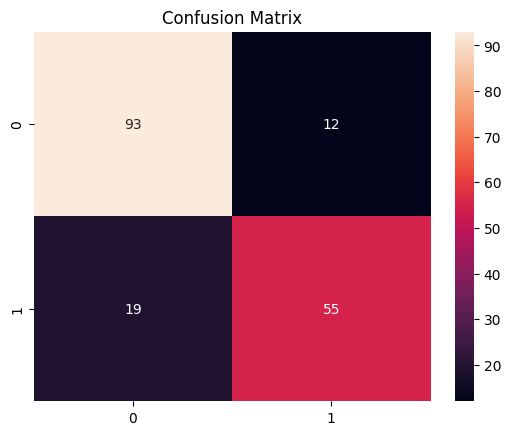

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy}')

from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_val, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


In [34]:
# # Predict survival on the test data
# test_predictions = model.predict(test_data_encoded)

# Prepare the submission file
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Save the submission file
submission.to_csv('titanic_submission.csv', index=False)

print("Predictions saved to 'titanic_submission.csv'")



Predictions saved to 'titanic_submission.csv'
